In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Read and loading the dataset

In [115]:
data=pd.read_csv(r'C:\Users\ABC\Desktop\MBA\@ moonths\PROJECT\EXPOSYS_LABS\50_Startups.csv')

In [116]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [117]:
data.shape

(50, 4)

## Checking for null values

In [118]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [119]:
data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Reanaming Column headers

In [120]:
data.columns=['R&D','Admin','Mkt','Profit']

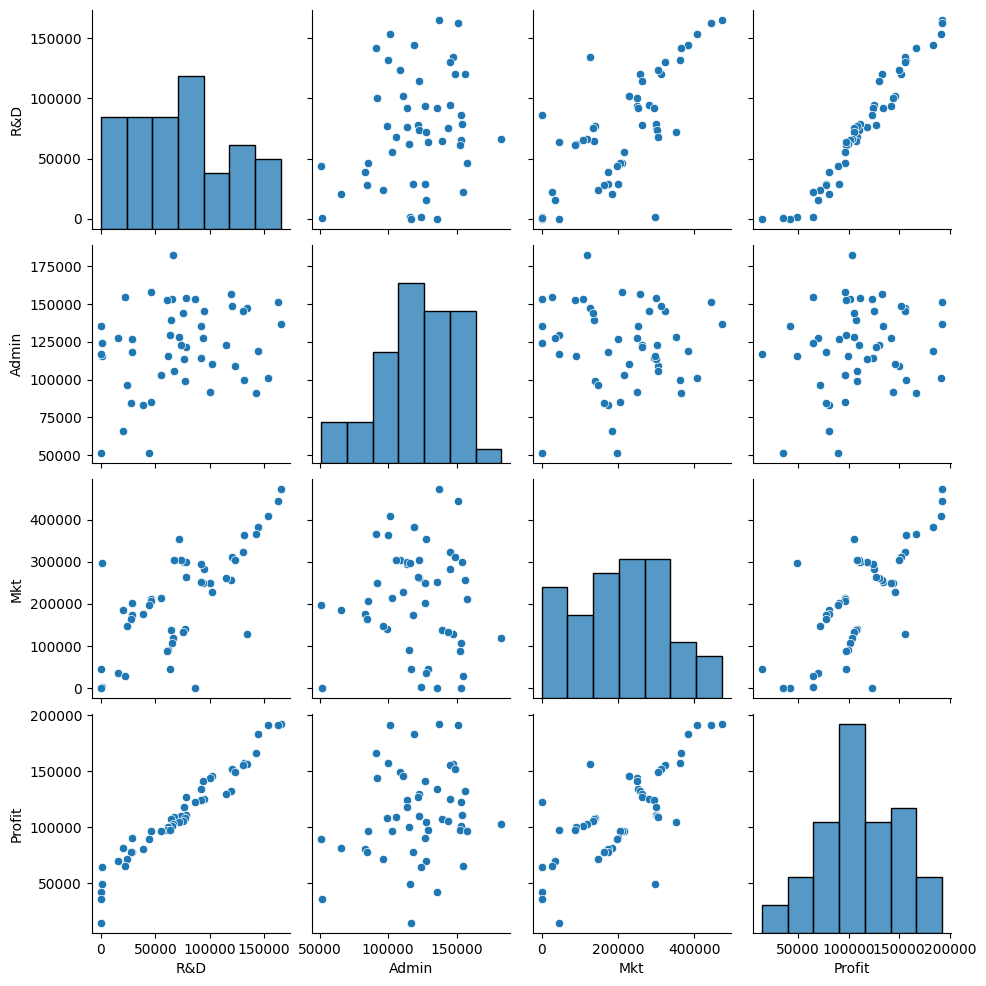

In [121]:
sns.pairplot(data=data)

In [122]:
cor=data.corr()
cor

,R&D,Admin,Mkt,Profit
R&D,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mkt,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

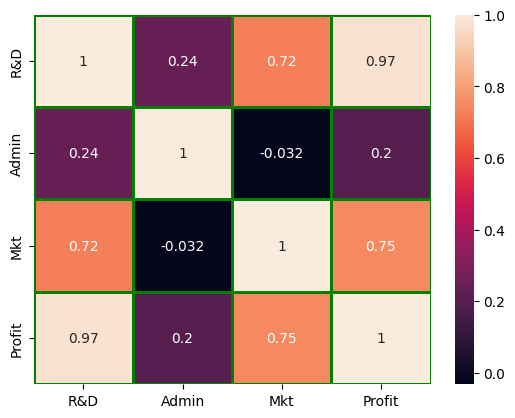

In [123]:
sns.heatmap(data=cor, annot=True, linewidth=2, linecolor='g')

In [124]:
# SLR R&D vs. Porfit
X=pd.DataFrame(data['R&D'])
Y=pd.DataFrame(data['Profit'])

In [125]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size=1/3, random_state=2)

In [127]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [128]:
# R&D vs. Profit
reg.fit(X_train, y_train)

LinearRegression()

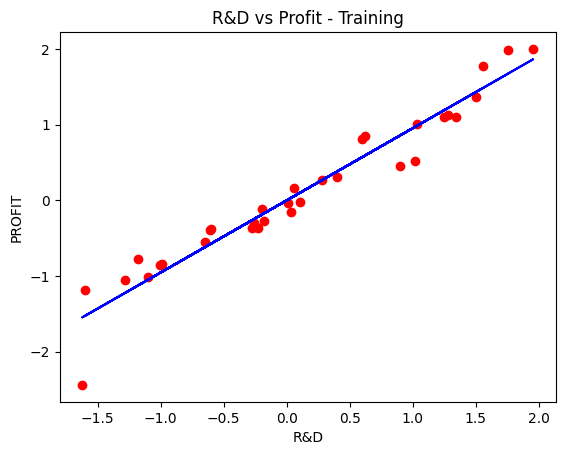

In [129]:
#visualize training data
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("R&D vs Profit - Training")
plt.xlabel("R&D")
plt.ylabel("PROFIT")
plt.show()

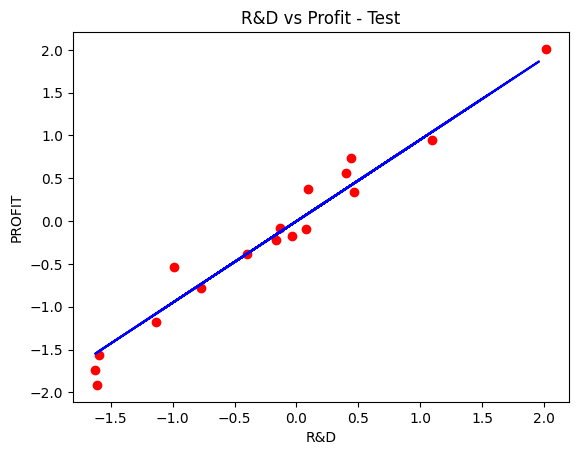

In [130]:
#visualize test data
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("R&D vs Profit - Test")
plt.xlabel("R&D")
plt.ylabel("PROFIT")
plt.show()

In [131]:
trainacc=round(reg.score(X_train,y_train)*100,2)
testacc=round(reg.score(X_test,y_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')
if trainacc>testacc:
    print("Model is Overfitting")

Training Accuracy: 93.61%
Test Accuracy: 96.13%


In [132]:
y_pred=reg.predict(X_test)

In [133]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(y_test,y_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred)))


r2 score is 0.9613
mean_sqrd_error is== 0.0385
root_mean_squared error of is== 0.1961682137082941


In [134]:
# MLR
Xm=pd.DataFrame(data.drop(['Profit'],axis=1))
Ym=pd.DataFrame(data['Profit'])


In [135]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#Xm = sc_X.fit_transform(Xm)
#Ym = sc_y.fit_transform(Ym)

In [136]:
X_train, X_test, y_train,y_test = train_test_split(Xm,Ym, test_size=1/3, random_state=2)

In [137]:
regm=LinearRegression()
regm.fit(X_train, y_train)

LinearRegression()

In [138]:
yM_pred = regm.predict(X_test)

In [158]:
trainacc=round(regm.score(X_train,y_train)*100,2)
testacc=round(regm.score(X_test,y_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')
if trainacc>testacc:
    print("Model is Overfitting")

Training Accuracy: 94.37%
Test Accuracy: 95.41%


In [139]:
score=r2_score(y_test,yM_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(y_test,yM_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,yM_pred)))


r2 score is 0.9541
mean_sqrd_error is== 72736731.7733
root_mean_squared error of is== 8528.583221923318


In [156]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)
y_pred_lass =lasso_reg.predict(X_test)

In [159]:
trainacc=round(lasso_reg.score(X_train,y_train)*100,2)
testacc=round(lasso_reg.score(X_test,y_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')
if trainacc>testacc:
    print("Model is Overfitting")

Training Accuracy: 94.37%
Test Accuracy: 95.41%


In [157]:
score=r2_score(y_test,y_pred_lass)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(y_test,y_pred_lass),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred_lass)))

r2 score is 0.9541
mean_sqrd_error is== 72736731.5692
root_mean_squared error of is== 8528.58320996093


In [140]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regd = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regd.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [141]:
#from sklearn.tree import export_graphviz
#export_graphviz(regd, out_file ='tree.dot',feature_names =['R&D','Admin','Mkt'])
#import graphviz
#with open(r"C:\Users\ABC\Desktop\MBA\@ moonths\PROJECT\EXPOSYS_LABS\.dot") as f:
#    dot_graph = f.read()
#graphviz.Source(dot_graph)

In [142]:
yd_pred = regd.predict(X_test)

In [160]:
trainacc=round(regd.score(X_train,y_train)*100,2)
testacc=round(regd.score(X_test,y_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')
if trainacc>testacc:
    print("Model is Overfitting")

Training Accuracy: 100.0%
Test Accuracy: 86.45%
Model is Overfitting


In [143]:
score=r2_score(y_test,yd_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(y_test,yd_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,yd_pred)))

r2 score is 0.8645
mean_sqrd_error is== 214508940.4927
root_mean_squared error of is== 14646.12373608297


In [165]:
#knn
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 19383.47476253101
RMSE value for k=  2 is: 18550.71888679151
RMSE value for k=  3 is: 17327.982440837946
RMSE value for k=  4 is: 19054.332026822056
RMSE value for k=  5 is: 20925.668776147726
RMSE value for k=  6 is: 22947.16452148373
RMSE value for k=  7 is: 24710.90645714349
RMSE value for k=  8 is: 26270.317351979567
RMSE value for k=  9 is: 28049.45667312606
RMSE value for k=  10 is: 28050.435994294636


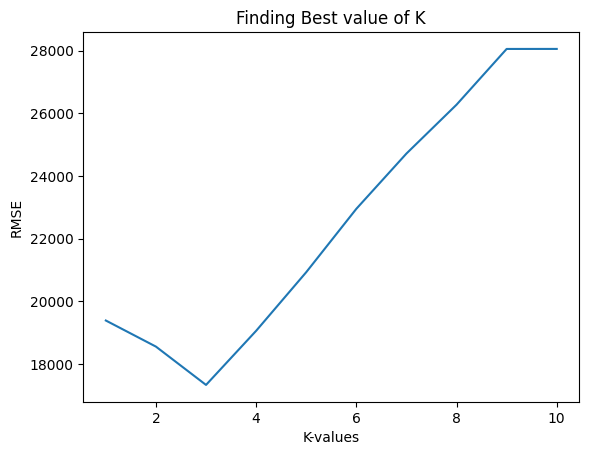

In [166]:
curve = pd.DataFrame(rmse_val) #elbow curve 
plt.plot(curve.index+1,curve)
plt.title("Finding Best value of K")
plt.xlabel("K-values")
plt.ylabel("RMSE")
plt.show()

In [167]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)  #fit the model
yk_pred=model.predict(X_test)

In [168]:
trainacc=round(model.score(X_train,y_train)*100,2)
testacc=round(model.score(X_test,y_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')
if trainacc>testacc:
    print("Model is Overfitting")

Training Accuracy: 90.96%
Test Accuracy: 81.04%
Model is Overfitting


In [169]:
score=r2_score(y_test,yk_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(y_test,yk_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,yk_pred)))

r2 score is 0.8104
mean_sqrd_error is== 300258975.47
root_mean_squared error of is== 17327.982440837946


In [172]:
# SVR
from sklearn.svm import SVR
regs = SVR(kernel = 'rbf')
regs.fit(X_train, y_train)

C:\Users\ABC\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [173]:
ys_pred=regs.predict(X_test)

In [174]:
trainacc=round(regs.score(X_train,y_train)*100,2)
testacc=round(regs.score(X_test,y_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')
if trainacc>testacc:
    print("Model is Overfitting")

Training Accuracy: -2.41%
Test Accuracy: -3.06%
Model is Overfitting


In [175]:
score=r2_score(y_test,ys_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(y_test,ys_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,ys_pred)))

r2 score is -0.0306
mean_sqrd_error is== 1631698017.2696
root_mean_squared error of is== 40394.28198730143


In [176]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100,random_state=0)
regr.fit(X_train, y_train)

C:\Users\ABC\AppData\Local\Temp\ipykernel_4572\4139230153.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [177]:
yr_pred=regr.predict(X_test)

In [178]:
trainacc=round(regr.score(X_train,y_train)*100,2)
testacc=round(regr.score(X_test,y_test)*100,2)
print(f'Training Accuracy: {trainacc}%')
print(f'Test Accuracy: {testacc}%')
if trainacc>testacc:
    print("Model is Overfitting")

Training Accuracy: 98.28%
Test Accuracy: 94.66%
Model is Overfitting


In [179]:
score=r2_score(y_test,yr_pred)
print("r2 score is",round(score, 4))
print("mean_sqrd_error is==",round(mean_squared_error(y_test,yr_pred),4))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,yr_pred)))

r2 score is 0.9466
mean_sqrd_error is== 84617281.6516
root_mean_squared error of is== 9198.765224287066


In [154]:
#score=r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(ys_pred))
#print("r2 score is",round(score, 4))
#print("mean_sqrd_error is==",round(mean_squared_error(sc_y.inverse_transform(y_test),sc_y.inverse_transform(ys_pred)),4))
#print("root_mean_squared error of is==",np.sqrt(mean_squared_error(sc_y.inverse_transform(y_test),sc_y.inverse_transform(ys_pred))))